In [2]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import tensorflow as tf

# 데이터셋 디렉토리 경로 설정
data_dir = '/Users/jangminjun/Desktop/babyproject/hear_ease-infant_crying_classification/data'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=16000)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=501)
        mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)
        RATIO = 862 / 64
        mel_spec_dB_resized = resize(mel_spec_dB, (mel_spec_dB.shape[0], mel_spec_dB.shape[1] * RATIO),
                                     anti_aliasing=True, mode='reflect')
        mel_spec_dB_stacked = np.stack([mel_spec_dB_resized] * 3, axis=-1)  # Stack 3 channels
        X.append(mel_spec_dB_stacked)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# ResNet-50 모델 불러오기 및 커스터마이징
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 862, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# 최종 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# ResNet-50 기본 모델 레이어를 고정하여 학습되지 않도록 함
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [3]:
pip install numba

  Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflowjs 4.1.0 requires flax>=0.5.3, which is not installed.
tensorflowjs 4.1.0 requires importlib_resources>=5.9.0, which is not installed.
tensorflowjs 4.1.0 requires jax>=0.3.16, which is not installed.
tensorflowjs 4.1.0 requires tensorflow-decision-forests>=1.0.1, which is not installed.
tensorflowjs 4.1.0 requires packaging~=20.9, but you have packaging 21.3 which is incompatible.
tensorflowjs 4.1.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.10 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Epoch 1/10
247/247 [==============================] - 597s 2s/step - loss: 1.6630 - accuracy: 0.3493 - val_loss: 1.5780 - val_accuracy: 0.3893
Epoch 2/10
247/247 [==============================] - 700s 3s/step - loss: 1.4779 - accuracy: 0.4319 - val_loss: 1.4847 - val_accuracy: 0.4441
Epoch 3/10
247/247 [==============================] - 743s 3s/step - loss: 1.4086 - accuracy: 0.4700 - val_loss: 1.4142 - val_accuracy: 0.4658
Epoch 4/10
247/247 [==============================] - 759s 3s/step - loss: 1.3443 - accuracy: 0.4923 - val_loss: 1.5074 - val_accuracy: 0.4155
Epoch 5/10
247/247 [==============================] - 747s 3s/step - loss: 1.3026 - accuracy: 0.5085 - val_loss: 1.3919 - val_accuracy: 0.4589
Epoch 6/10
247/247 [==============================] - 743s 3s/step - loss: 1.2500 - accuracy: 0.5344 - val_loss: 1.3518 - val_accuracy: 0.4749
Epoch 7/10
247/247 [==============================] - 732s 3s/step - loss: 1.2089 - accuracy: 0.5576 - val_loss: 1.3314 - val_accuracy: 0.4783

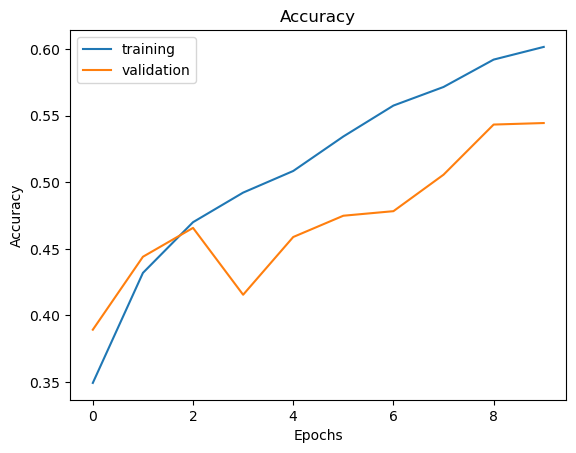

In [3]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import tensorflow as tf

# 데이터셋 디렉토리 경로 설정
data_dir = '/Users/jangminjun/Desktop/babyproject/hear_ease-infant_crying_classification/data'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=16000)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=501)
        mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)
        RATIO = 862 / 64
        mel_spec_dB_resized = resize(mel_spec_dB, (mel_spec_dB.shape[0], mel_spec_dB.shape[1] * RATIO),
                                     anti_aliasing=True, mode='reflect')
        mel_spec_dB_stacked = np.stack([mel_spec_dB_resized] * 3, axis=-1)  # Stack 3 channels
        X.append(mel_spec_dB_stacked)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# ResNet-50 모델 불러오기 및 커스터마이징
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 862, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# 최종 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# ResNet-50 기본 모델 레이어를 고정하여 학습되지 않도록 함
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/25
247/247 [==============================] - 709s 3s/step - loss: 1.6840 - accuracy: 0.3385 - val_loss: 1.5860 - val_accuracy: 0.3995
Epoch 2/25
247/247 [==============================] - 822s 3s/step - loss: 1.4812 - accuracy: 0.4278 - val_loss: 1.4818 - val_accuracy: 0.4395
Epoch 3/25
247/247 [==============================] - 898s 4s/step - loss: 1.3981 - accuracy: 0.4745 - val_loss: 1.4730 - val_accuracy: 0.4338
Epoch 4/25
247/247 [==============================] - 900s 4s/step - loss: 1.3511 - accuracy: 0.4954 - val_loss: 1.4443 - val_accuracy: 0.4361
Epoch 5/25
247/247 [==============================] - 932s 4s/step - loss: 1.3038 - accuracy: 0.5116 - val_loss: 1.3826 - val_accuracy: 0.4658
Epoch 6/25
247/247 [==============================] - 961s 4s/step - loss: 1.2504 - accuracy: 0.5419 - val_loss: 1.3656 - val_accuracy: 0.4737
Epoch 7/25
247/247 [==============================] - 974s 4s/step - loss: 1.2048 - accuracy: 0.5561 - val_loss: 1.3003 - val_accuracy: 0.5023

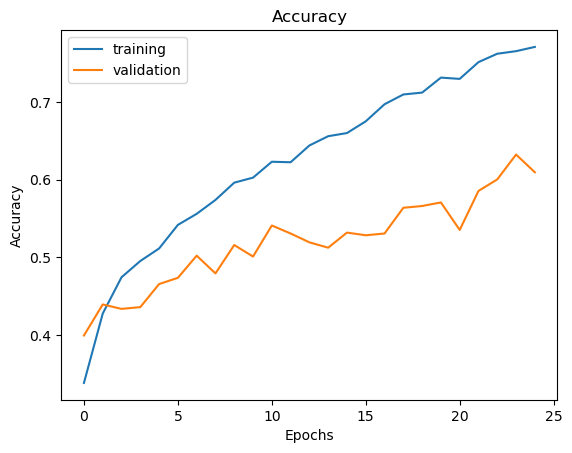

In [1]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import tensorflow as tf

# 데이터셋 디렉토리 경로 설정
data_dir = '/Users/jangminjun/Desktop/babyproject/hear_ease-infant_crying_classification/data'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=16000)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=501)
        mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)
        RATIO = 862 / 64
        mel_spec_dB_resized = resize(mel_spec_dB, (mel_spec_dB.shape[0], mel_spec_dB.shape[1] * RATIO),
                                     anti_aliasing=True, mode='reflect')
        mel_spec_dB_stacked = np.stack([mel_spec_dB_resized] * 3, axis=-1)  # Stack 3 channels
        X.append(mel_spec_dB_stacked)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# ResNet-50 모델 불러오기 및 커스터마이징
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 862, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# 최종 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# ResNet-50 기본 모델 레이어를 고정하여 학습되지 않도록 함
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()